In [10]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook

In [97]:
fs = 102400
duration = 0.01

target_frequency = 5000
target_duration = 0.001

delay_1 = 2/1500
alpha = 0.5

<IPython.core.display.Javascript object>


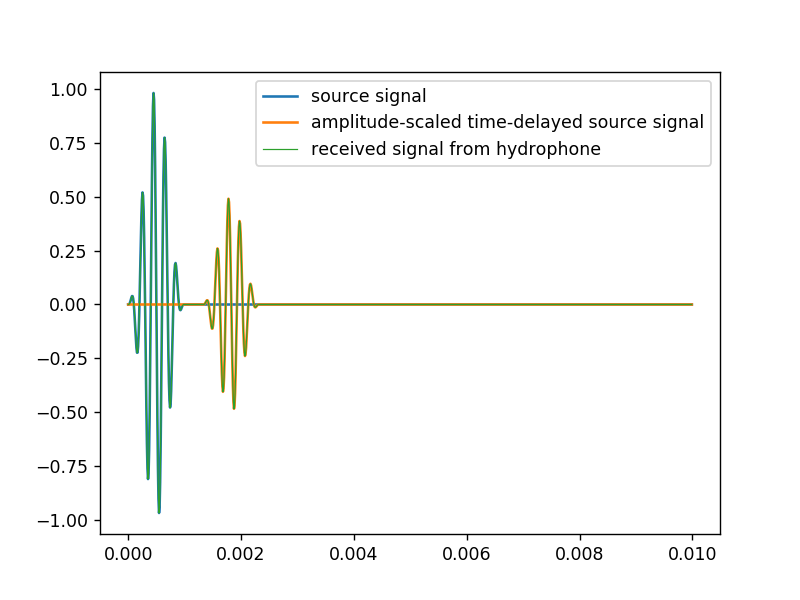

In [141]:
t = np.arange(int(target_duration*fs))/fs

s = np.sin(2*np.pi*target_frequency*t)
# s = np.ones(len(t))
window = np.hanning(len(s))
# window = np.ones(len(s))
# window = np.blackman(len(s))
s = window*s
delay_s = alpha*s

s = np.concatenate((s, np.zeros(int(duration*fs)-len(s))))
delay_s = np.concatenate((np.zeros(int(delay_1*fs)), delay_s))
delay_s = np.concatenate((delay_s, np.zeros(int(duration*fs)-len(delay_s))))

received_signal = s + delay_s 

time = np.arange(int(duration*fs))/fs
fig, ax = plt.subplots()
ax.plot(time, s, label="source signal")
ax.plot(time, delay_s, label="amplitude-scaled time-delayed source signal")
ax.plot(time, received_signal, label="received signal from hydrophone", lw=.7)
ax.legend()

<IPython.core.display.Javascript object>


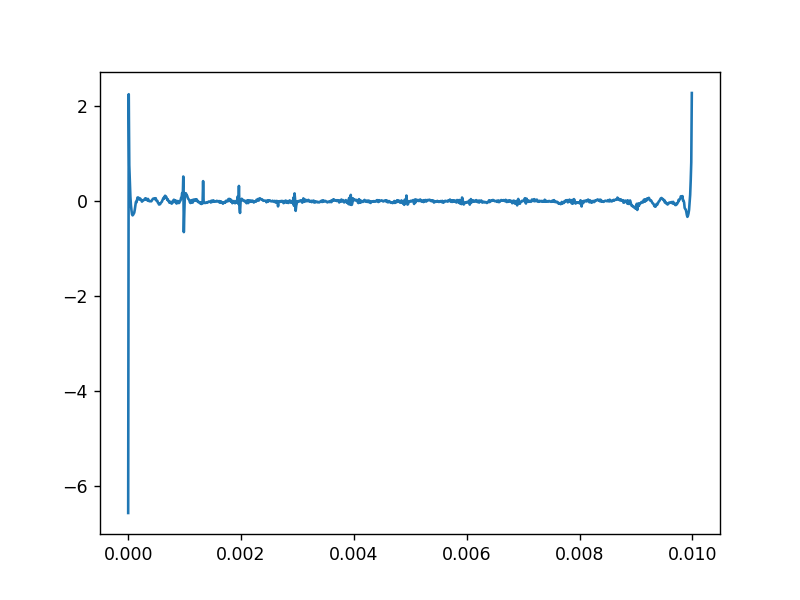

In [144]:
X = np.fft.fft(received_signal)

# X_freq = np.fft.fftshift(np.fft.fftfreq(len(X), d=1/fs))
# fig, ax = plt.subplots()
# ax.plot(X_freq, np.fft.fftshift(abs(X)))

# power_spectrum = abs(X)*abs(X)
power_spectrum = X

log_spectrum = np.log(power_spectrum)

cepstrum = np.real(np.fft.ifft(log_spectrum))

fig, ax = plt.subplots()
ax.plot(time, cepstrum)
# # ax.set_yscale("log")

In [80]:
log_spectrum[1]

(1.0071413859372025+0.9448440429131734j)

In [100]:
plt.close()

In [103]:
np.log(1+2j)

(0.8047189562170503+1.1071487177940904j)

In [124]:
import sys
print(sys.min)

AttributeError: module 'sys' has no attribute 'min'